#### CMSE 202 Final Project
### &#9989; Annalise Cornell, Ren McIntyre, Erika Bartosiewicz
### &#9989; Section 002, Project Environmental 1
#### &#9989; 3/31/2020

https://www.ncrs.fs.fed.us/pubs/jrnl/2013/nrs_2013_zheng_001.pdf
    
https://www.mrlc.gov/data?f%5B0%5D=year%3A2016

# ___Urban Forest Canopy Resilience___

https://www.fs.fed.us/psw/topics/urban_forestry/products/cufr_43.pdf (Chapter three,  
- Calculate CO2 Reduction and Release for Mature Trees 38, 
- Calculate CO2 Reduction and Release for 40 Years  39
- Calculating Cost per Tonne  42

https://daac.ornl.gov/CMS/guides/CMS_LiDAR_Biomass_MD_PA_DE.html
- import new data (known biomass)
- making a regression line charting biomass to land cover area
- use that to predict above ground biomass for urban canopy
- 50 percent = carbon sequestration

## Problem

Trees and shrubbery provide several benefits for the community. With increased CO2 emissions and global warming gaining increased concern in the past decades, the protection of the urban forest canopy becomes increasingly important to increase its resilience to climate change.

Most of the world's population now lives in what are considered urban areas, and these account for between 40-70 percent of greenhouse gas emissions (Safford et. al., 2013). Urban forests, a term referring to the trees and shrubbery within a densly populated area, might be helpful in strengthening resilience to climate change (Safford et. al., 2013). Plants are known to utilize atmospheric CO2 in the process of photosynthesis, and so they take away from the excess CO2 emissions brought about by humans. 

This project will look to model how population density and tree density impact carbon sequestration and storage as well as how they take away from total air pollution, thus adding to resilience against climate change.

## Data

In [1]:
import pandas as pd

mi = pd.ExcelFile("MI_Tables.xls")
print(mi.sheet_names)

summary_data = pd.read_excel("MI_Tables.xls", "1", skiprows = 2)
summary_data.rename(columns = {"Michigan,1": "Statistic", "Urban a": "Urban", "Community b": "Community", "Urban or community c":"Urban or community"}, inplace = True)
summary_data.head()

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17']


,Michigan,Unnamed: 1,Statewide,Urban,Community,Urban or community
0,Population,2000,9.938444e+06,7.419457e+06,6.384273e+06,NaN
1,NaN,1990,9.295297e+06,6.555842e+06,6.073842e+06,NaN
2,NaN,% Change (1990-2000),6.919058e+00,1.317321e+01,5.110950e+00,NaN
3,NaN,% Total population (2000),1.000000e+02,7.465411e+01,6.423815e+01,NaN
4,Total area,km2 (2000),2.504936e+05,8.879499e+03,7.871445e+03,11283.569664


In [2]:
pop_and_urban_land = pd.read_excel("MI_Tables.xls", "2", skiprows = 3)
pop_and_urban_land.rename(columns = {"Unnamed: 0": "Community Name", 2000: "Population in 2000", "%": "% Urban Land", "% Change from 1990.1": "% urban change from 1990"}, inplace = True)
pop_and_urban_land.head()

,Community Name,Population in 2000,% Change from 1990,Density (people/km2),% Urban Land,% urban change from 1990
0,Addison village,627,-0.007911,248.105093,0.000000,NaN
1,Adrian city,21574,-0.023668,1167.386317,0.928864,0.004382
2,Ahmeek village,157,0.060811,864.120335,0.000000,NaN
3,Akron village,461,0.095012,186.667543,0.000000,NaN
4,Alanson village,785,0.159527,311.907842,0.000000,NaN


In [3]:
canopy_data_by_community = pd.read_excel("MI_Tables.xls", "5", skiprows = 3)
canopy_data_by_community.rename(columns = {"Unnamed: 0": "Community Name", "Unnamed: 1": "Mapping Zone", "%": "% Impervious surface cover", "m2/person": "Impervious surface cover m2/person", "%.1": "% Tree Canopy Cover", "m2/person.1": "Tree Canopy Cover m2/person"}, inplace = True)
canopy_data_by_community.head()

,Community Name,Mapping Zone,% Impervious surface cover,Impervious surface cover m2/person,% Tree Canopy Cover,Tree Canopy Cover m2/person,Total green space (ha),Canopy green space %,Available green space (ha)
0,Addison village,51,0.104587,434.009569,0.110675,459.272727,232.9780,0.123601,204.1810
1,Adrian city,51,0.383536,330.702698,0.085301,73.550107,1146.7500,0.138371,988.3540
2,Ahmeek village,51,0.326839,326.006369,0.185460,184.987261,10.5417,0.275506,7.6374
3,Akron village,51,0.091949,492.754881,0.037486,200.889371,224.3340,0.041282,215.0730
4,Alanson village,51,0.116852,389.453503,0.357788,1192.459873,231.0580,0.405128,137.4690


In [4]:
land_data_by_community = pd.read_excel("MI_Tables.xls", "8", skiprows = 3)
land_data_by_community.rename(columns = {"Unnamed: 0": "Community Name", "Land area km2": "Developed land area km2", "Land area %": "Developed land area %", "Tree % h": "Developed tree % h", "AGS % i": "Developed AGS % i", "Land area km2.1": "Barren land area km2", "Land area %.1": "Barren land area %", "Tree % h.1": "Barren tree % h", "AGS % i.1": "Barren AGS % i", "Land area km2.2": "Forested land area km2", "Land area %.2": "Forested land area %", "Tree % h.2": "Forested tree % h", "AGS % i.2": "Forested AGS % i", "Land area km2.3": "Scrub land area km2", "Land area %.3": "Scrub land area %", "Tree % h.3": "Scrub tree % h", "AGS % i.3": "Scrub AGS % i", "Land area km2.4": "Grassland land area km2", "Land area %.4": "Grassland land area %", "Tree % h.4": "Grassland tree % h", "AGS % i.4": "Grassland AGS % i", "Land area km2.5": "Agricultural land area km2", "Land area %.5": "Agricultural land area %", "Tree % h.5": "Agricultural tree % h", "AGS % i.5": "Agricultural AGS % i", "Land area km2.6": "Wetland land area km2", "Land area %.6": "Wetland land area %", "Tree % h.6": "Wetland tree % h", "AGS % i.6": "Wetland AGS % i"}, inplace = True)
land_data_by_community.head()

,Community Name,Developed land area km2,Developed land area %,Developed tree % h,Developed AGS % i,Barren land area km2,Barren land area %,Barren tree % h,Barren AGS % i,Forested land area km2,...,Grassland tree % h,Grassland AGS % i,Agricultural land area km2,Agricultural land area %,Agricultural tree % h,Agricultural AGS % i,Wetland land area km2,Wetland land area %,Wetland tree % h,Wetland AGS % i
0,Addison village,0.8703,0.334486,0.068966,0.618356,0.0045,0.001730,0.028000,0.972000,0.2358,...,0.011111,0.988889,1.4553,0.559322,0.081132,0.918869,0.0198,0.007610,0.105000,0.895000
1,Adrian city,17.6571,0.949199,0.068349,0.527746,0.0306,0.001645,0.000000,1.000000,0.2754,...,0.000000,1.000000,0.5895,0.031690,0.319115,0.680885,0.0486,0.002613,0.392593,0.607407
2,Ahmeek village,0.1395,0.890805,0.150903,0.482194,0.0000,0.000000,NaN,NaN,0.0144,...,NaN,NaN,0.0027,0.017241,0.530000,0.470000,0.0000,0.000000,NaN,NaN
3,Akron village,0.7101,0.287432,0.057921,0.622180,0.0000,0.000000,NaN,NaN,0.0738,...,0.000000,1.000000,1.6767,0.678689,0.011111,0.988889,0.0000,0.000000,NaN,NaN
4,Alanson village,1.1007,0.420709,0.115789,0.606631,0.0063,0.002408,0.268571,0.731429,0.4851,...,0.194021,0.805979,0.6318,0.241486,0.558476,0.441524,0.1152,0.044032,0.163594,0.836406


In [5]:
assessment_stats = pd.read_excel("MI_Tables_edited.xls", "11", skiprows = 3)
assessment_stats.rename(columns = {"Unnamed: 0": "Mapping Zone", "Unnamed: 1": "Geography", "Unnamed: 2": "Population Density Class", "Unnamed: 3": "n", "Maximum": "Tree Canopy Cover Maximum", "Minimum": "Tree Canopy Cover Minimum", "Median": "Tree Canopy Cover Median", "Weighted mean d": "Tree Canopy Cover Weighted Mean"}, inplace = True)
assessment_stats.head()

,Mapping Zone,Geography,Population Density Class,n,Tree Canopy Cover Maximum,Tree Canopy Cover Minimum,Tree Canopy Cover Median,Tree Canopy Cover Weighted Mean
0,41,Community,1,69,0.8868,0.0100,0.50070,0.560652
1,41,Community,2,86,0.8449,0.0089,0.23295,0.304143
2,41,Community,3,90,0.7005,0.0116,0.24705,0.321387
3,41,Community,4,61,0.6696,0.0114,0.15050,0.276733
4,41,Community,5,58,0.5227,0.0220,0.14090,0.179855


In [6]:
community_assessment = pd.read_excel("MI_Tables.xls", "12", skiprows = 2)
community_assessment.head()

,Name,Mapping zone,Rating
0,Addison village,51,Poor
1,Adrian city,51,Poor
2,Ahmeek village,51,Fair
3,Akron village,51,Poor
4,Alanson village,51,Good


In [7]:
planting_priority = pd.read_excel("MI_Tables.xls", "15", skiprows = 2)
planting_priority.head()

,Name,Planting priority index
0,Addison village,55.9
1,Adrian city,64.6
2,Ahmeek village,55.8
3,Akron village,59.1
4,Alanson village,43.7


In [8]:
known_biomass = pd.read_excel("knownBiomass.xlsx")
known_biomass.rename(columns = {"Unnamed: 0": "Type"}, inplace = True)
known_biomass.head()

,Type,Mean biomass 1,Mean biomass 2,Mean biomass 3,Area (Mha),Total biomass (Mg×10^6),Percentage of total biomass (%)
0,Northern hardwood,56.6,60.7,56.6,11.0,621.3,12.6
1,Northern mixedwood,63.3,69.7,63.3,9.8,620.9,12.6
2,Boreal (commercial),50.6,56.1,50.6,37.5,1897.3,38.4
3,Boreal (noncommerical),36.2,41.4,36.2,17.7,640.1,13.0
4,Taiga,23.8,28.2,23.8,29.5,702.0,14.2


## Model

The mean-squared error of the regression model is 89459.25 and the coefficient of determination is 0.96.
The slope of the linear regression line is 4.136545678791208 and the y-intercept is [0.0388314] .


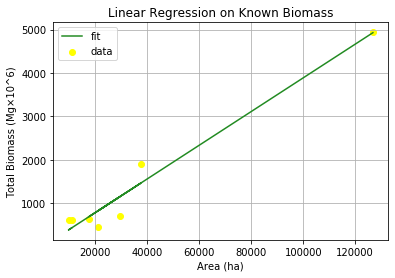

In [9]:
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

known_area = pd.DataFrame(known_biomass["Area (Mha)"]*1000)
known_bio = pd.DataFrame(known_biomass["Total biomass (Mg×10^6)"])

lm = linear_model.LinearRegression()
model = lm.fit(known_area, known_bio["Total biomass (Mg×10^6)"])
known_biomass_predictions = lm.predict(known_area)

mse = metrics.mean_squared_error(known_bio["Total biomass (Mg×10^6)"], known_biomass_predictions)
cod = metrics.r2_score(known_bio["Total biomass (Mg×10^6)"], known_biomass_predictions)
print("The mean-squared error of the regression model is {:.2f} and the coefficient of determination is {:.2f}.".format(mse, cod))
print("The slope of the linear regression line is", lm.intercept_,"and the y-intercept is", lm.coef_, ".")

plt.scatter(known_biomass["Area (Mha)"]*1000, known_biomass["Total biomass (Mg×10^6)"], label = "data", color = "yellow")
plt.plot(known_biomass["Area (Mha)"]*1000, known_biomass_predictions, label = "fit", color = "forestgreen")
plt.title("Linear Regression on Known Biomass")
plt.xlabel("Area (ha)")
plt.ylabel("Total Biomass (Mg×10^6)")
plt.legend()
plt.grid()

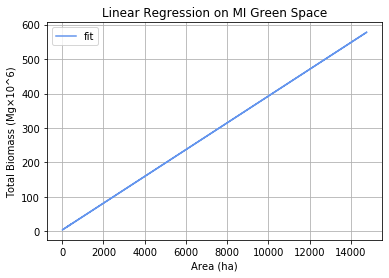

In [10]:
mi_area = pd.DataFrame(canopy_data_by_community["Total green space (ha)"])
mi_biomass_predictions = lm.predict(mi_area)

plt.plot(canopy_data_by_community["Total green space (ha)"], mi_biomass_predictions, label = "fit", color = "cornflowerblue")
plt.title("Linear Regression on MI Green Space")
plt.xlabel("Area (ha)")
plt.ylabel("Total Biomass (Mg×10^6)")
plt.legend()
plt.grid()

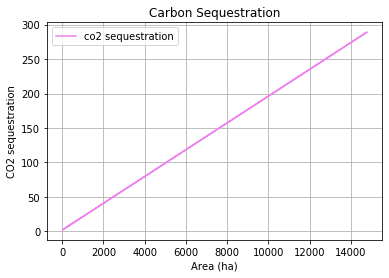

In [11]:
co2_sequestration = mi_biomass_predictions*0.5

plt.plot(canopy_data_by_community["Total green space (ha)"], co2_sequestration, label = "co2 sequestration", color = "violet")
plt.title("Carbon Sequestration")
plt.xlabel("Area (ha)")
plt.ylabel("CO2 sequestration")
plt.legend()
plt.grid()

## Results

_(Results.)_

## Conclusions

_(Conclusions.)_

### References

Safford, H.; Larry, E.; McPherson, E.G.; Nowak, D.J.; Westphal, L.M. (August 2013). Urban Forests and Climate Change. U.S. Department of Agriculture, Forest Service, Climate Change Resource Center. www.fs.usda.gov/ccrc/topics/urban-forests/